# Pytorch

In [25]:
# !pip install --upgrade torch torchvision

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)


In [0]:
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

In [0]:
import numpy as np
import torch

from torch.utils.data import DataLoader
from torch.utils.data.sampler import BatchSampler


class BalancedBatchSampler(BatchSampler):
    """
    BatchSampler - from a MNIST-like dataset, samples n_classes and within these classes samples n_samples.
    Returns batches of size n_classes * n_samples
    """

    def __init__(self, dataset, n_classes, n_samples):
        loader = DataLoader(dataset)
        self.labels_list = []
        for _, label in loader:
            self.labels_list.append(label)
        self.labels = torch.LongTensor(self.labels_list)
        self.labels_set = list(set(self.labels.numpy()))
        self.label_to_indices = {label: np.where(self.labels.numpy() == label)[0]
                                 for label in self.labels_set}
        for l in self.labels_set:
            np.random.shuffle(self.label_to_indices[l])
        self.used_label_indices_count = {label: 0 for label in self.labels_set}
        self.count = 0
        self.n_classes = n_classes
        self.n_samples = n_samples
        self.dataset = dataset
        self.batch_size = self.n_samples * self.n_classes

    def __iter__(self):
        self.count = 0
        while self.count + self.batch_size < len(self.dataset):
            classes = np.random.choice(self.labels_set, self.n_classes, replace=False)
            indices = []
            for class_ in classes:
                indices.extend(self.label_to_indices[class_][
                               self.used_label_indices_count[class_]:self.used_label_indices_count[
                                                                         class_] + self.n_samples])
                self.used_label_indices_count[class_] += self.n_samples
                if self.used_label_indices_count[class_] + self.n_samples > len(self.label_to_indices[class_]):
                    np.random.shuffle(self.label_to_indices[class_])
                    self.used_label_indices_count[class_] = 0
            yield indices
            self.count += self.n_classes * self.n_samples

    def __len__(self):
        return len(self.dataset) // self.batch_size


Extracting mnist/mnist_train/MNIST/raw/train-images-idx3-ubyte.gz to mnist/mnist_train/MNIST/raw


Extracting mnist/mnist_train/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/mnist_train/MNIST/raw


Extracting mnist/mnist_train/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/mnist_train/MNIST/raw




Extracting mnist/mnist_train/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/mnist_train/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


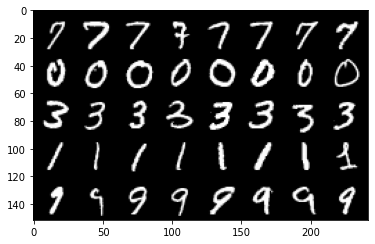

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt

n_classes = 5
n_samples = 8

mnist_train =  torchvision.datasets.MNIST(root="mnist/mnist_train", train=True, download=True, transform=transforms.Compose([transforms.ToTensor(),]))

balanced_batch_sampler = BalancedBatchSampler(mnist_train, n_classes, n_samples)

dataloader = torch.utils.data.DataLoader(mnist_train, batch_sampler=balanced_batch_sampler)
my_testiter = iter(dataloader)
images, target = my_testiter.next()


def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

imshow(torchvision.utils.make_grid(images))

In [4]:
ran =  torch.randn(1000)
torch.mean(ran)

tensor(0.0004)

In [5]:
torch.std(ran)

tensor(0.9851)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


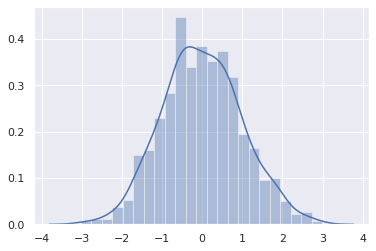

In [6]:
import numpy as np
import seaborn as sns

sns.set()
sns.distplot(ran)


In [0]:
# --ニューラルネットワーク定義--
from torch.autograd import variable
import torch.nn as nn

class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    # 入力層
    self.layer1 = nn.Linear(28*28, 100)
    # 中間層
    self.layer2 = nn.Linear(100, 50)
    # 出力層
    self.layer3 = nn.Linear(50, 10)